**Навигация по уроку**

1. [Задачи машинного зрения на OpenCV](https://colab.research.google.com/drive/1x1rxbNfV1ft1ztIPwxA3q34J4MULix5A)
2. [OpenCV. Распознавание лиц (практика)](https://colab.research.google.com/drive/1GwMZ8BAjtdKBDA5S0lAX1OPMFmIaYhqL)
3. Домашняя работа


Используя знания из практической части урока и функцию `blur_face` (размытие), проведите следующий эксперимент:
1. Найдите фото любого известного актера или актрисы.
2. Распознайте лицо на фотографии. Выделите лицо овалом. Какой метод для рисования овала использовать, вы должны найти самостоятельно.
3. Выделите на изображении глаза. Выделите их кружком. Если вы чувствуете в себе суперсилу и дополнительный бекграунд знаний, и хотите получить больше баллов за задание, то нарисуйте вместо кружков солнцезащитные очки (картинку очков можно найти в интернете, задача их правильно масштабировать и разместить).
4. Все лицо кроме глаз необходимо "заблюрить" (размыть) с помощью функции `blur_face` (функция объявлена ниже).




Оценка за задание:
* 1 балл - задача решена с помощью куратора, лицо распознано прямоугольником, глаза кругом.
* 2 балла - задача решена с незначительными подсказками куратора, лицо распознано прямоугольником или кругом, глаза кругом, лицо размыто.
* 3 балла - задача решена самостоятельно, лицо распознано овалом, глаза кругом, удалось заблюрить лицо, не затронув глаза.
* 4 балла - задача решена самостоятельно на 3 балла, удалось нарисовать очки с подсказкой куратора, недостаточна соблюдена симметрия расположения очков или недостаточно учтены их размеры.
* 5 баллов - задача полностью решена самостоятельно, все пункты выполнены.

In [ ]:
import cv2

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)



In [ ]:
# Ваше решение

In [ ]:
!pip install opencv-python

#Описание cv2.ellipse
```
cv2.ellipse(
    img,          # Изображение, на котором рисуется эллипс
    center,       # Центр эллипса (x, y)
    axes,         # Длины большой и малой полуосей (width, height)
    angle,        # Угол поворота эллипса (в градусах)
    start_angle,  # Начальный угол дуги (в градусах)
    end_angle,    # Конечный угол дуги (в градусах)
    color,        # Цвет линии (BGR-формат)
    thickness=1,  # Толщина линии (-1 для заливки)
    lineType=cv2.LINE_AA  # Тип линии (например, сглаженная)
)
```

Text(0.5, 1.0, 'Выделение лица')

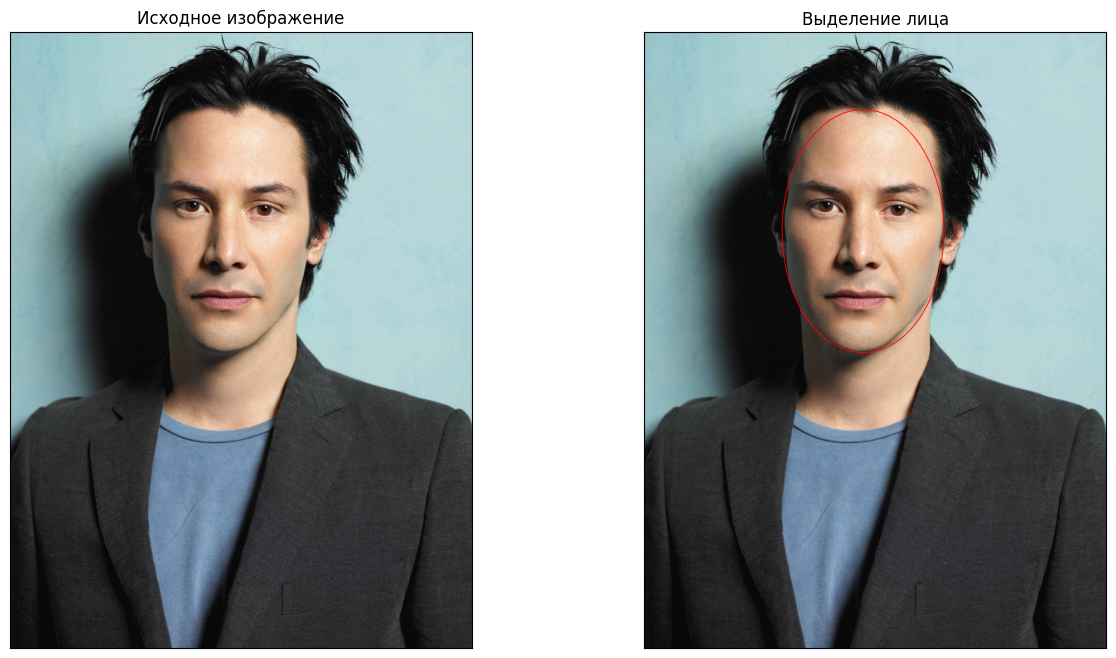

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
%matplotlib inline

#скачиваем картинку
gdown.download('https://kartinki.pics/uploads/posts/2022-06/1654658987_1-kartinkin-net-p-kianu-rivz-kartinki-1.jpg', './keanu.jpg', quiet=True)

img = cv2.imread('./keanu.jpg')

img2 = img.copy()

classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')

#ищем лицо
faces = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(150, 150))

for (x, y, w, h) in faces:

    #рисуем овал
    face_center = (x + w//2, y + h//2)
    face_axes = (int(w*0.3), int(h*0.45))
    cv2.ellipse(img2, face_center, face_axes, angle=0, startAngle=0, endAngle=360, color=(0,0,255), thickness=4)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Выделение лица')

#Добавим выделение глаз

Text(0.5, 1.0, 'Выделение лица и глаз')

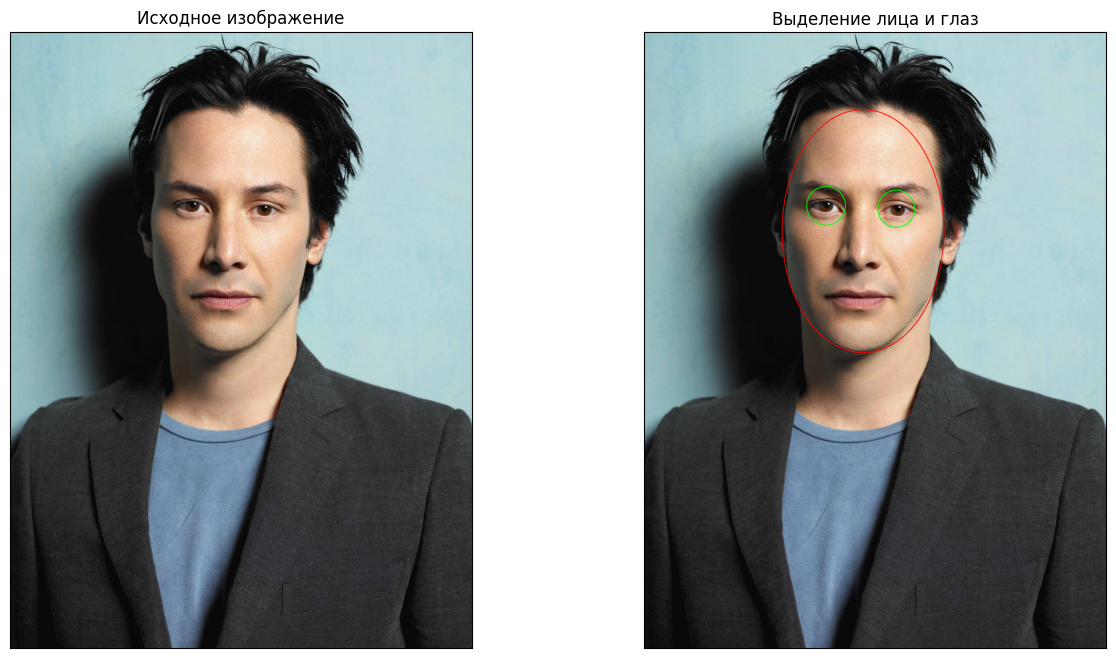

In [ ]:
img = cv2.imread('./keanu.jpg')

img2 = img.copy()
#классификатор лиц
classifier_faces = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')
#классификатор глаз
classifier_eyes = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
#ищем лица
faces = classifier_faces.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(150, 150))

for (x, y, w, h) in faces:

    #рисуем овал
    face_center = (x + w//2, y + h//2)
    face_axes = (int(w*0.3), int(h*0.45))
    cv2.ellipse(img2, face_center, face_axes, angle=0, startAngle=0, endAngle=360, color=(0,0,255), thickness=4)

    #находим глаза
    face = img2[y:y + h, x:x + w] #ограничиваем поиск по лицу
    eyes = classifier_eyes.detectMultiScale(face)

    for (ex, ey, ew, eh) in eyes:
        #находим центр
        eye_center = (int(ex + 0.5*ew), int(ey + 0.5*eh))
        #задаем радиус
        radius = int(0.22*(ew + eh))
        color = (0, 255, 0)
        thickness = 3
        #рисуем круг
        cv2.circle(face, eye_center, radius, color, thickness)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Выделение лица и глаз')

#Добавим очки

Text(0.5, 1.0, 'Выделение лица и глаз')

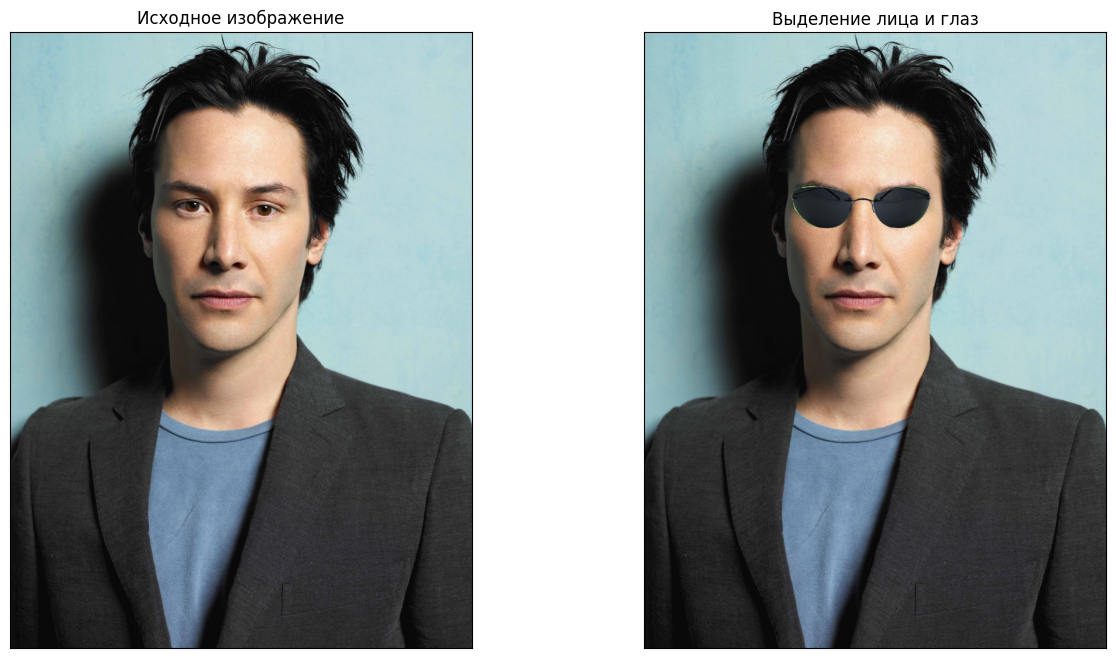

In [ ]:
import numpy as np
gdown.download('https://storage.yandexcloud.net/quiz.pic/eyeglass.png', './eyeglass.png', quiet=True)
glass_mask=cv2.imread('./eyeglass.png')
h_mask, w_mask = glass_mask.shape[:2]

img = cv2.imread('./keanu.jpg')
img2 = img.copy()
#классификатор лиц
classifier_faces = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')
#классификатор глаз
classifier_eyes = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
#ищем лица
faces = classifier_faces.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

for (x, y, w, h) in faces:

    #рисуем овал
    face_center = (x + w//2, y + h//2)
    face_axes = (int(w*0.3), int(h*0.45))
    #cv2.ellipse(img2, face_center, face_axes, angle=0, startAngle=0, endAngle=360, color=(0,0,255), thickness=4)

    #находим глаза
    face = img2[y:y + h, x:x + w] #ограничиваем поиск по лицу
    eyes = classifier_eyes.detectMultiScale(face)

    #у нас одно лицо, проверим, что нашлись всего 2 глаза и найдем координаты центров глаз
    if len(eyes) == 2:
        #отсортируем правый и левый
        eyes = sorted(eyes, key=lambda e: e[0])
        (ex1, ey1, ew1, eh1) = eyes[0] #левый глаз
        (ex2, ey2, ew2, eh2) = eyes[1] #правый глаз

        #найдем центры глаз
        # ВАЖНО! для данного случая центр мы ищем на полной картинке
        # по этому в координатах добавляем координаты полной картинка
        left_eye_center = (x + ex1 + ew1//2, y + ey1 + eh1//2)
        right_eye_center = (x + ex2 + ew2//2, y + ey2 + eh2//2)

        #найдем расстояние между центрами
        eye_distance = np.sqrt((right_eye_center[0] - left_eye_center[0])**2 + (right_eye_center[1] - left_eye_center[1])**2)

        #подгоним масштаб маски
        #расстояние между центрами глаз у маски (очки делятся на 4 равные части, 2 равные части посередине и есть нужная величина)
        mask_eye_distance = w_mask//2
        #коэффициент масштабирования
        scale = eye_distance / mask_eye_distance
        #новый размер
        new_h = int(h_mask * scale)
        new_w = int(w_mask * scale)
        #масштабируем по новому размеру
        mask_resized = cv2.resize(glass_mask, (new_w, new_h))

        #располагаем маску на фото
        mask_center_x = (left_eye_center[0] + right_eye_center[0])//2
        mask_center_y = (left_eye_center[1] + right_eye_center[1])//2
        #позиция по верхнему левому углу для расположения на фото
        x1 = mask_center_x - new_w // 2
        y1 = mask_center_y - new_h // 2
        x2 = x1 + new_w
        y2 = y1 + new_h
        # сначала указал область на face, что привело к несовпадению размеров масок
        # плюс если бы маска вместилась, то все равно позиция бы не совпадала с нужной
        masked_eyes = img2[y1:y2, x1:x2]

        #сделаем ч/б очки
        gray_mask = cv2.cvtColor(mask_resized, cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(gray_mask, 0, 255, cv2.THRESH_BINARY_INV)
        #инвертируем побитово маску
        mask_inv = cv2.bitwise_not(mask)

        # Важно! размеры маски и
        masked_glass = cv2.bitwise_and(mask_resized, mask_resized, mask=mask_inv)
        masked_face = cv2.bitwise_and(masked_eyes, masked_eyes, mask=mask)

        #складываем изображения
        img2[y1:y2, x1:x2] = cv2.add(masked_glass, masked_face)

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Выделение лица и глаз')

#Заблюрим лицо, кроме глаз

In [ ]:
import cv2

def blur_face(img):
  (h, w) = img.shape[:2]
  dW = int(w / 3.0)
  dH = int(h / 3.0)
  if dW % 2 == 0:
      dW -= 1
  if dH % 2 == 0:
      dH -= 1
  return cv2.GaussianBlur(img, (dW, dH), 0)

img = cv2.imread('./keanu.jpg')

#размываем изображение
blurred = blur_face(img)

Text(0.5, 1.0, 'заблюренное изображение')

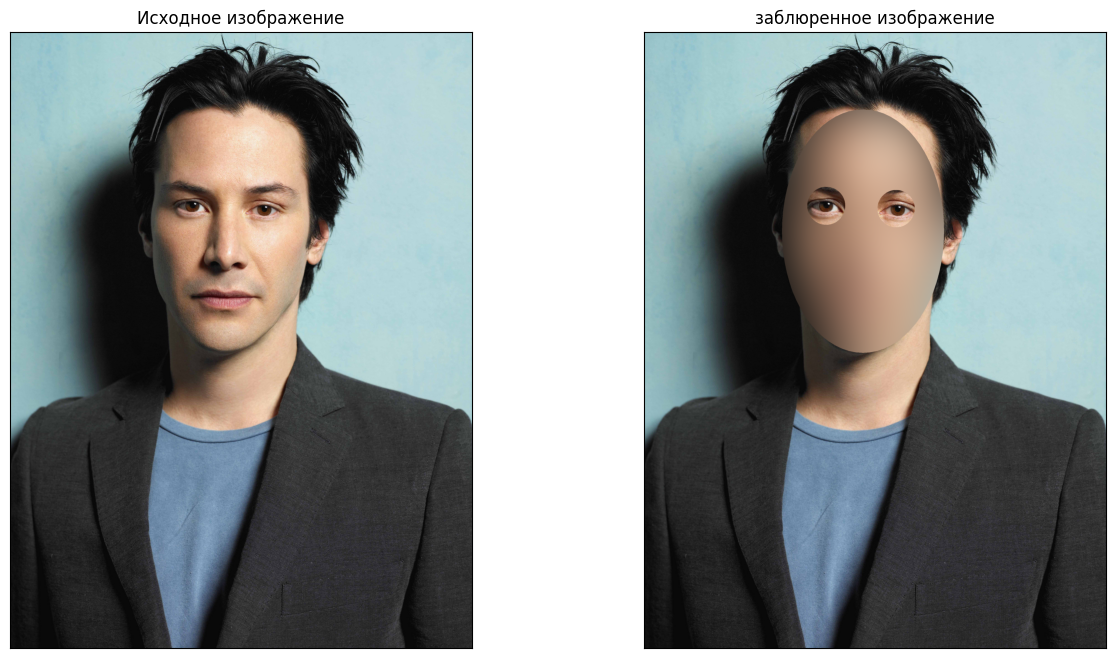

In [ ]:
img2 = img.copy()
#классификатор лиц
classifier_faces = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_default.xml')
#классификатор глаз
classifier_eyes = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
#ищем лица
faces = classifier_faces.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(150, 150))

for (x, y, w, h) in faces:

    #создадим маску для картинки, которую потом будем обрезать найденными элементами
    mask = np.zeros_like(img2)

    #рисуем овал на маске
    face_center = (x + w//2, y + h//2)
    face_axes = (int(w*0.3), int(h*0.45))
    cv2.ellipse(mask, face_center, face_axes, angle=0, startAngle=0, endAngle=360, color=(255,255,255), thickness=-1)

    #находим глаза
    face = img2[y:y + h, x:x + w] #ограничиваем поиск по лицу
    eyes = classifier_eyes.detectMultiScale(face)

    for (ex, ey, ew, eh) in eyes:
        # находим центр
        # ВАЖНО! для данного случая центр мы ищем на маске полной картинки
        # по этому в координатах добавляем координаты полной картинка
        eye_center = (x + int(ex + 0.5*ew), y + int(ey + 0.5*eh))
        #задаем радиус
        radius = int(0.22*(ew + eh))
        color = (0, 0, 0)
        thickness = -1
        #рисуем круг на маске
        cv2.circle(mask, eye_center, radius, color, thickness)


    #комбинируем с маской
    result = np.where(mask == 255, blurred, img2)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('заблюренное изображение')

# Итог

Выполнили все поставленные задачи: нашли лицо, обвели его овалом, поместили оцки на глаза, а так же заблюрили лицо кроме глаз.